In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy.interpolate import RegularGridInterpolator

In [2]:
N = 1000
pi = np.pi

lamb_list = np.linspace(0,2*pi,N)
beta_list = np.arcsin(np.linspace(-1,1,N))
psi_list  = np.linspace(0,pi,N)
iota_list = np.arccos(np.linspace(-1,1,N))

In [3]:
sky_result = np.loadtxt('RF_sky_result.txt')
pol_result = np.loadtxt('RF_polar_result.txt')

In [4]:
def geoplot_xticks(longtitude):
    longtitude_plot = np.copy(longtitude)
    longtitude_plot[np.where(longtitude >= pi)] -= 2*pi
    return geoplot_result(longtitude_plot)

def geoplot_result(longtitude):
    longtitude_plot = np.zeros_like(longtitude)
    N_len = len(longtitude)
    if (N_len % 2 == 1):
        longtitude_plot[0:N_len//2+1] = np.copy(longtitude[-N_len//2::])
        longtitude_plot[-N_len//2+1::] = np.copy(longtitude[0:N_len//2])
    elif (N_len % 2 == 0):
        longtitude_plot[0:N_len//2] = np.copy(longtitude[-N_len//2::])
        longtitude_plot[-N_len//2::] = np.copy(longtitude[0:N_len//2])
    else:
        raise ValueError
    return longtitude_plot

In [5]:
# (θs = −4.7◦, φs = 120.5◦) in the ecliptic coordinates.
thetas = -4.7
phis = 120.5

In [6]:
orbit_tq = np.loadtxt('TQ_orbit.txt').T

lamb_tq = geoplot_xticks(orbit_tq[0]/180*pi)
beta_tq = geoplot_result(orbit_tq[1]/180*pi)

idx_max = np.where(lamb_tq==np.max(lamb_tq))[0][0]
idx_min = np.where(lamb_tq==np.min(lamb_tq))[0][0]
print(idx_max, idx_min)

lamb_tq = lamb_tq[idx_max:idx_min+1]*180/pi
beta_tq = beta_tq[idx_max:idx_min+1]*180/pi

176 540


In [7]:
factor = 180/pi
geoplot_lamb_list = geoplot_xticks(lamb_list)
geoplot_sky_result = geoplot_result(sky_result).T

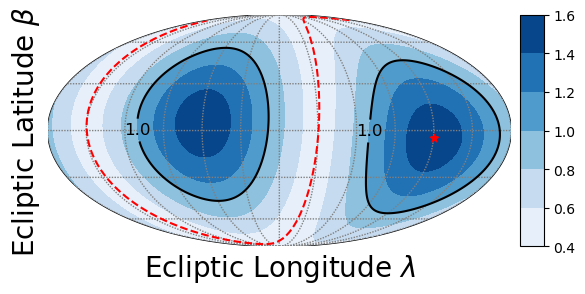

In [8]:
levels = np.arange(0.4,1.6,0.2)

plt.figure()
bmap = Basemap(projection='moll'
               ,lon_0=0
               ,lat_0=0
               ,resolution='i' # c (crude), l (low), i (intermediate), h (high), f (full)
               )
Lamb_list, Beta_list = bmap(*np.meshgrid(geoplot_lamb_list*factor, beta_list*factor))

bmap.drawmeridians(np.arange(0,360,30),color='grey')
bmap.drawparallels(np.arange(-90,90,30),color='grey')

bmap.contourf(Lamb_list,Beta_list,geoplot_sky_result
              ,levels=levels
              ,cmap='Blues'
              ,zorder=1)

bmap.colorbar(ticks=levels)
CS = bmap.contour(Lamb_list,Beta_list,geoplot_sky_result,levels=[1.0],colors='black',zorder=2)
manual_locations = [bmap(-120,0), bmap(60, 0)]
clabels = plt.clabel(CS, fontsize=12, inline=True, manual=manual_locations, fmt='%1.1f', zorder=3)
for label in clabels:
    label.set_rotation(0)

# convert to map projection coords. 
# Note that lon, lat can be scalars, lists or numpy arrays.
lamb_tq_pt,beta_tq_pt = bmap(lamb_tq,beta_tq)
phis_pt,thetas_pt = bmap(phis,thetas)

bmap.plot(lamb_tq_pt,beta_tq_pt,'r--',zorder=4, rasterized=True)
bmap.scatter(phis_pt,thetas_pt,c='r',marker='*',zorder=4, rasterized=True)

plt.xlabel(r'Ecliptic Longitude $\lambda$',fontsize=20)
plt.ylabel(r'Ecliptic Latitude $\beta$',fontsize=20)
plt.savefig('TQ_sky.png',bbox_inches='tight')
plt.savefig('TQ_sky.pdf',bbox_inches='tight')
plt.show()

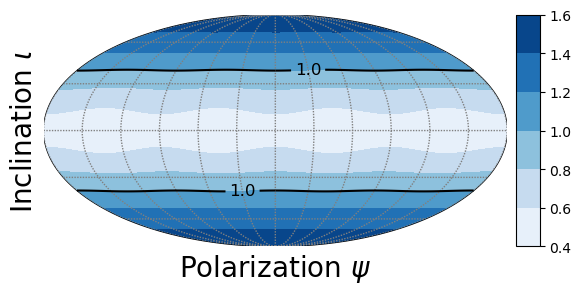

In [9]:
levels = np.arange(0.4,1.6,0.2)

plt.figure()
bmap = Basemap(projection='moll'
               ,lon_0=0
               ,lat_0=0
               ,resolution='i' # c (crude), l (low), i (intermediate), h (high), f (full)
               )
Psi_list, Iota_list = bmap(*np.meshgrid(psi_list*factor, iota_list*factor-90))
Psi_list2, Iota_list2 = bmap(*np.meshgrid(psi_list*factor*-1, iota_list*factor-90))

bmap.drawmeridians(np.arange(0,360,30),color='grey')
bmap.drawparallels(np.arange(-90,90,30),color='grey')

bmap.contourf(Psi_list,Iota_list,pol_result.T
              ,levels=levels
              ,cmap='Blues'
              )
bmap.contourf(Psi_list2,Iota_list2,pol_result.T
              ,levels=levels
              ,cmap='Blues'
              )
bmap.colorbar(ticks=levels)
CS = plt.contour(Psi_list,Iota_list,pol_result.T,levels=[1.0],colors='black')
CS2 = plt.contour(Psi_list2,Iota_list2,pol_result.T,levels=[1.0],colors='black')

clabels = plt.clabel(CS, fontsize=12, inline=True, manual=[bmap(30, 40)], fmt='%1.1f')
clabels2 = plt.clabel(CS2, fontsize=12, inline=True, manual=[bmap(-30, -40)], fmt='%1.1f')
for label in clabels:
    label.set_rotation(0)
for label in clabels2:
    label.set_rotation(0)

plt.xlabel(r'Polarization $\psi$',fontsize=20)
plt.ylabel(r'Inclination $\iota$',fontsize=20)
plt.savefig('TQ_polar.png',bbox_inches='tight')
plt.savefig('TQ_polar.pdf',bbox_inches='tight')
plt.show()

In [10]:
sky_interp = RegularGridInterpolator((lamb_list, beta_list), sky_result)
pol_interp = RegularGridInterpolator((psi_list,  iota_list), pol_result)

In [11]:
# test
print(sky_interp([phis/factor, thetas/factor])[0],pol_interp([0, 0])[0])

1.501531987549618 1.4998794180542827
